<a href="https://colab.research.google.com/github/PriyanshuKotiyal/IPL-ANALYSIS/blob/main/IPL_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mat=pd.read_csv("matches.csv")

In [4]:
dev=pd.read_csv("deliveries.csv")

In [5]:
mat.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
mat.shape

(1095, 20)

In [7]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [136]:
mat.describe()

,match_id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [9]:
# city with most matches won
mat.groupby(["city"]).agg({"winner":["count"]}).max()

,,0
winner,count,173


In [10]:
mat.groupby(["city"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)


,winner
,count
city,
Mumbai,173


In [11]:
# team that won most matches
mat["winner"].value_counts().head(1)

,count
winner,
Mumbai Indians,144


In [12]:
# player who won most of man of the match awards
mat["player_of_match"].value_counts().head(1)

,count
player_of_match,
AB de Villiers,25


In [13]:
# most frequent umpire 1
mat["umpire1"].value_counts().head(1)

,count
umpire1,
AK Chaudhary,115


In [14]:
# most frequent umpire 2

mat["umpire2"].value_counts().head(1)

,count
umpire2,
S Ravi,83


In [15]:
mat.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1095.0,904828.319635,367740.242299,335982.0,548331.5,980961.0,1254062.5,1426312.0
result_margin,1076.0,17.259294,21.787444,1.0,6.0,8.0,20.0,146.0
target_runs,1092.0,165.684066,33.427048,43.0,146.0,166.0,187.0,288.0
target_overs,1092.0,19.759341,1.581108,5.0,20.0,20.0,20.0,20.0


In [16]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [17]:
dev.shape

(260920, 17)

In [18]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

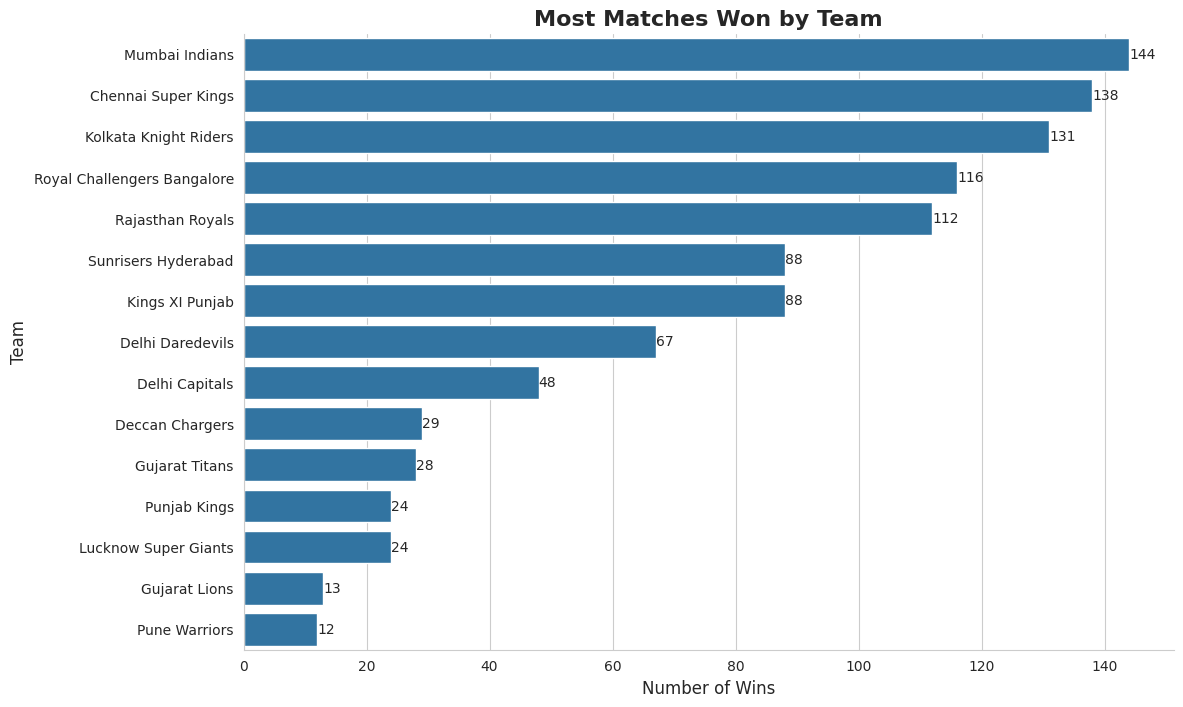

In [143]:
top_15_winners = mat['winner'].value_counts().head(15).reset_index()
top_15_winners.columns = ['Team', 'Wins']

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Wins',
    y='Team',
    data=top_15_winners

)

ax.bar_label(ax.containers[0])

ax.set_title("Most Matches Won by Team", fontsize=16, fontweight="bold")
ax.set_xlabel("Number of Wins", fontsize=12)
ax.set_ylabel("Team", fontsize=12)
sns.despine()

plt.show()

In [20]:
mat.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

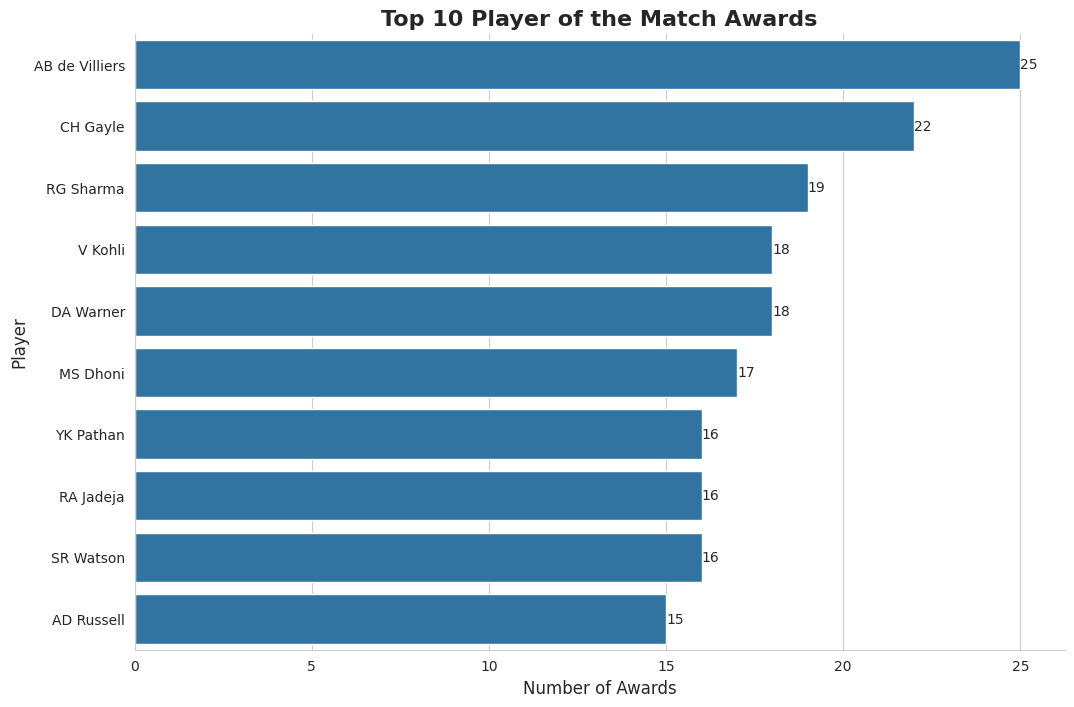

In [145]:
top_10_pom = mat['player_of_match'].value_counts().head(10).reset_index()
top_10_pom.columns = ['Player', 'Awards']

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Awards',
    y='Player',
    data=top_10_pom
)

ax.bar_label(ax.containers[0])

ax.set_title("Top 10 Player of the Match Awards", fontsize=16, fontweight="bold")
ax.set_xlabel("Number of Awards", fontsize=12)
ax.set_ylabel("Player", fontsize=12)
sns.despine()

plt.show()

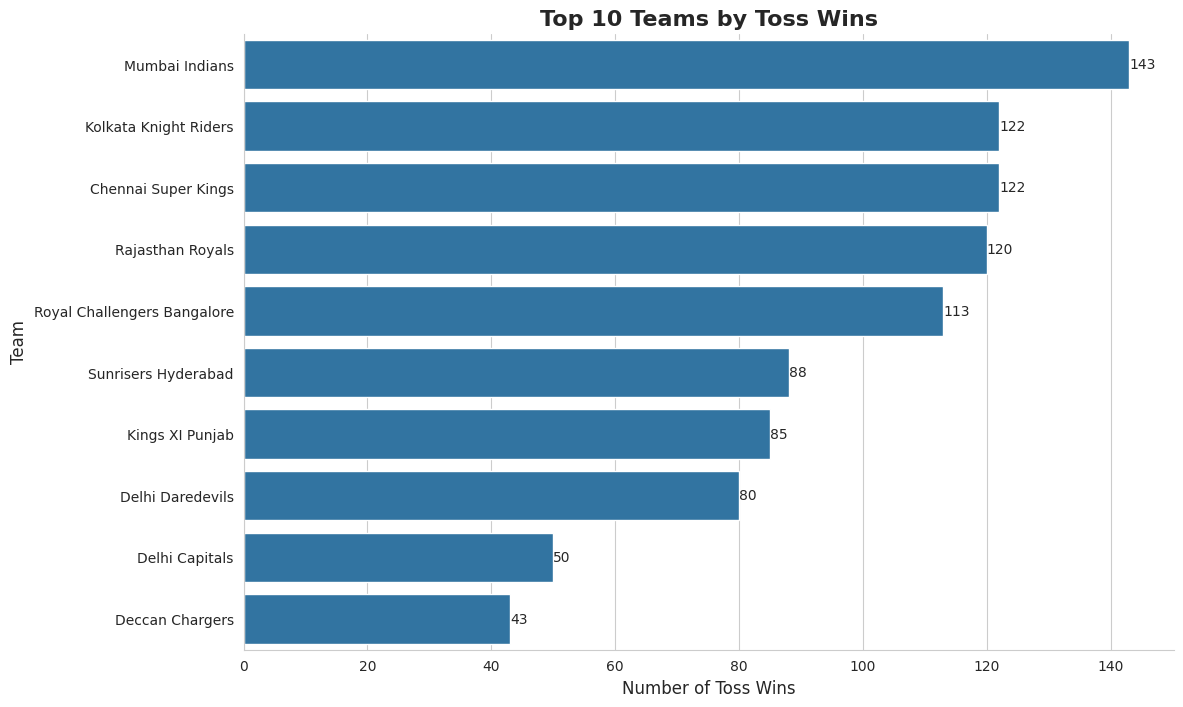

In [146]:
top_10_toss = mat['toss_winner'].value_counts().head(10).reset_index()
top_10_toss.columns = ['Team', 'Toss Wins']

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Toss Wins',
    y='Team',
    data=top_10_toss
)

ax.bar_label(ax.containers[0])

ax.set_title("Top 10 Teams by Toss Wins", fontsize=16, fontweight="bold")
ax.set_xlabel("Number of Toss Wins", fontsize=12)
ax.set_ylabel("Team", fontsize=12)
sns.despine()

plt.show()

In [23]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).max()

,,0
winner,count,143


In [24]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
toss_winner,
Mumbai Indians,143


In [25]:
mat=mat.rename(columns={"id":"match_id"})

In [26]:
mat

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [27]:
dev.head(250)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,335983,1,Chennai Super Kings,Kings XI Punjab,3,1,MEK Hussey,S Sreesanth,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
246,335983,1,Chennai Super Kings,Kings XI Punjab,3,2,MEK Hussey,S Sreesanth,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
247,335983,1,Chennai Super Kings,Kings XI Punjab,3,3,MEK Hussey,S Sreesanth,ML Hayden,1,0,1,NaN,0,NaN,NaN,NaN
248,335983,1,Chennai Super Kings,Kings XI Punjab,3,4,ML Hayden,S Sreesanth,MEK Hussey,1,0,1,NaN,0,NaN,NaN,NaN


In [28]:
df=pd.merge(mat,dev,on="match_id",how="left")

In [29]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [30]:
df.isnull().sum()

,0
match_id,0
season,0
city,12397
date,0
match_type,0
player_of_match,490
venue,0
team1,0
team2,0
toss_winner,0


In [31]:
df.shape

(260920, 36)

In [32]:
df.dropna(how="all",axis=1).head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   season            260920 non-null  object 
 2   city              248523 non-null  object 
 3   date              260920 non-null  object 
 4   match_type        260920 non-null  object 
 5   player_of_match   260430 non-null  object 
 6   venue             260920 non-null  object 
 7   team1             260920 non-null  object 
 8   team2             260920 non-null  object 
 9   toss_winner       260920 non-null  object 
 10  toss_decision     260920 non-null  object 
 11  winner            260430 non-null  object 
 12  result            260920 non-null  object 
 13  result_margin     256796 non-null  float64
 14  target_runs       260611 non-null  float64
 15  target_overs      260611 non-null  float64
 16  super_over        26

In [34]:
mat.groupby(["season"]).agg({"match_id":"count"}).rename(columns={'match_id':'no. of matches'})

,no. of matches
season,
2007/08,58
2009,57
2009/10,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


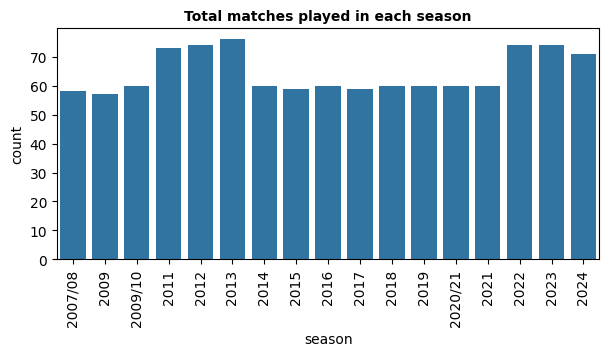

In [35]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="season",data=mat)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

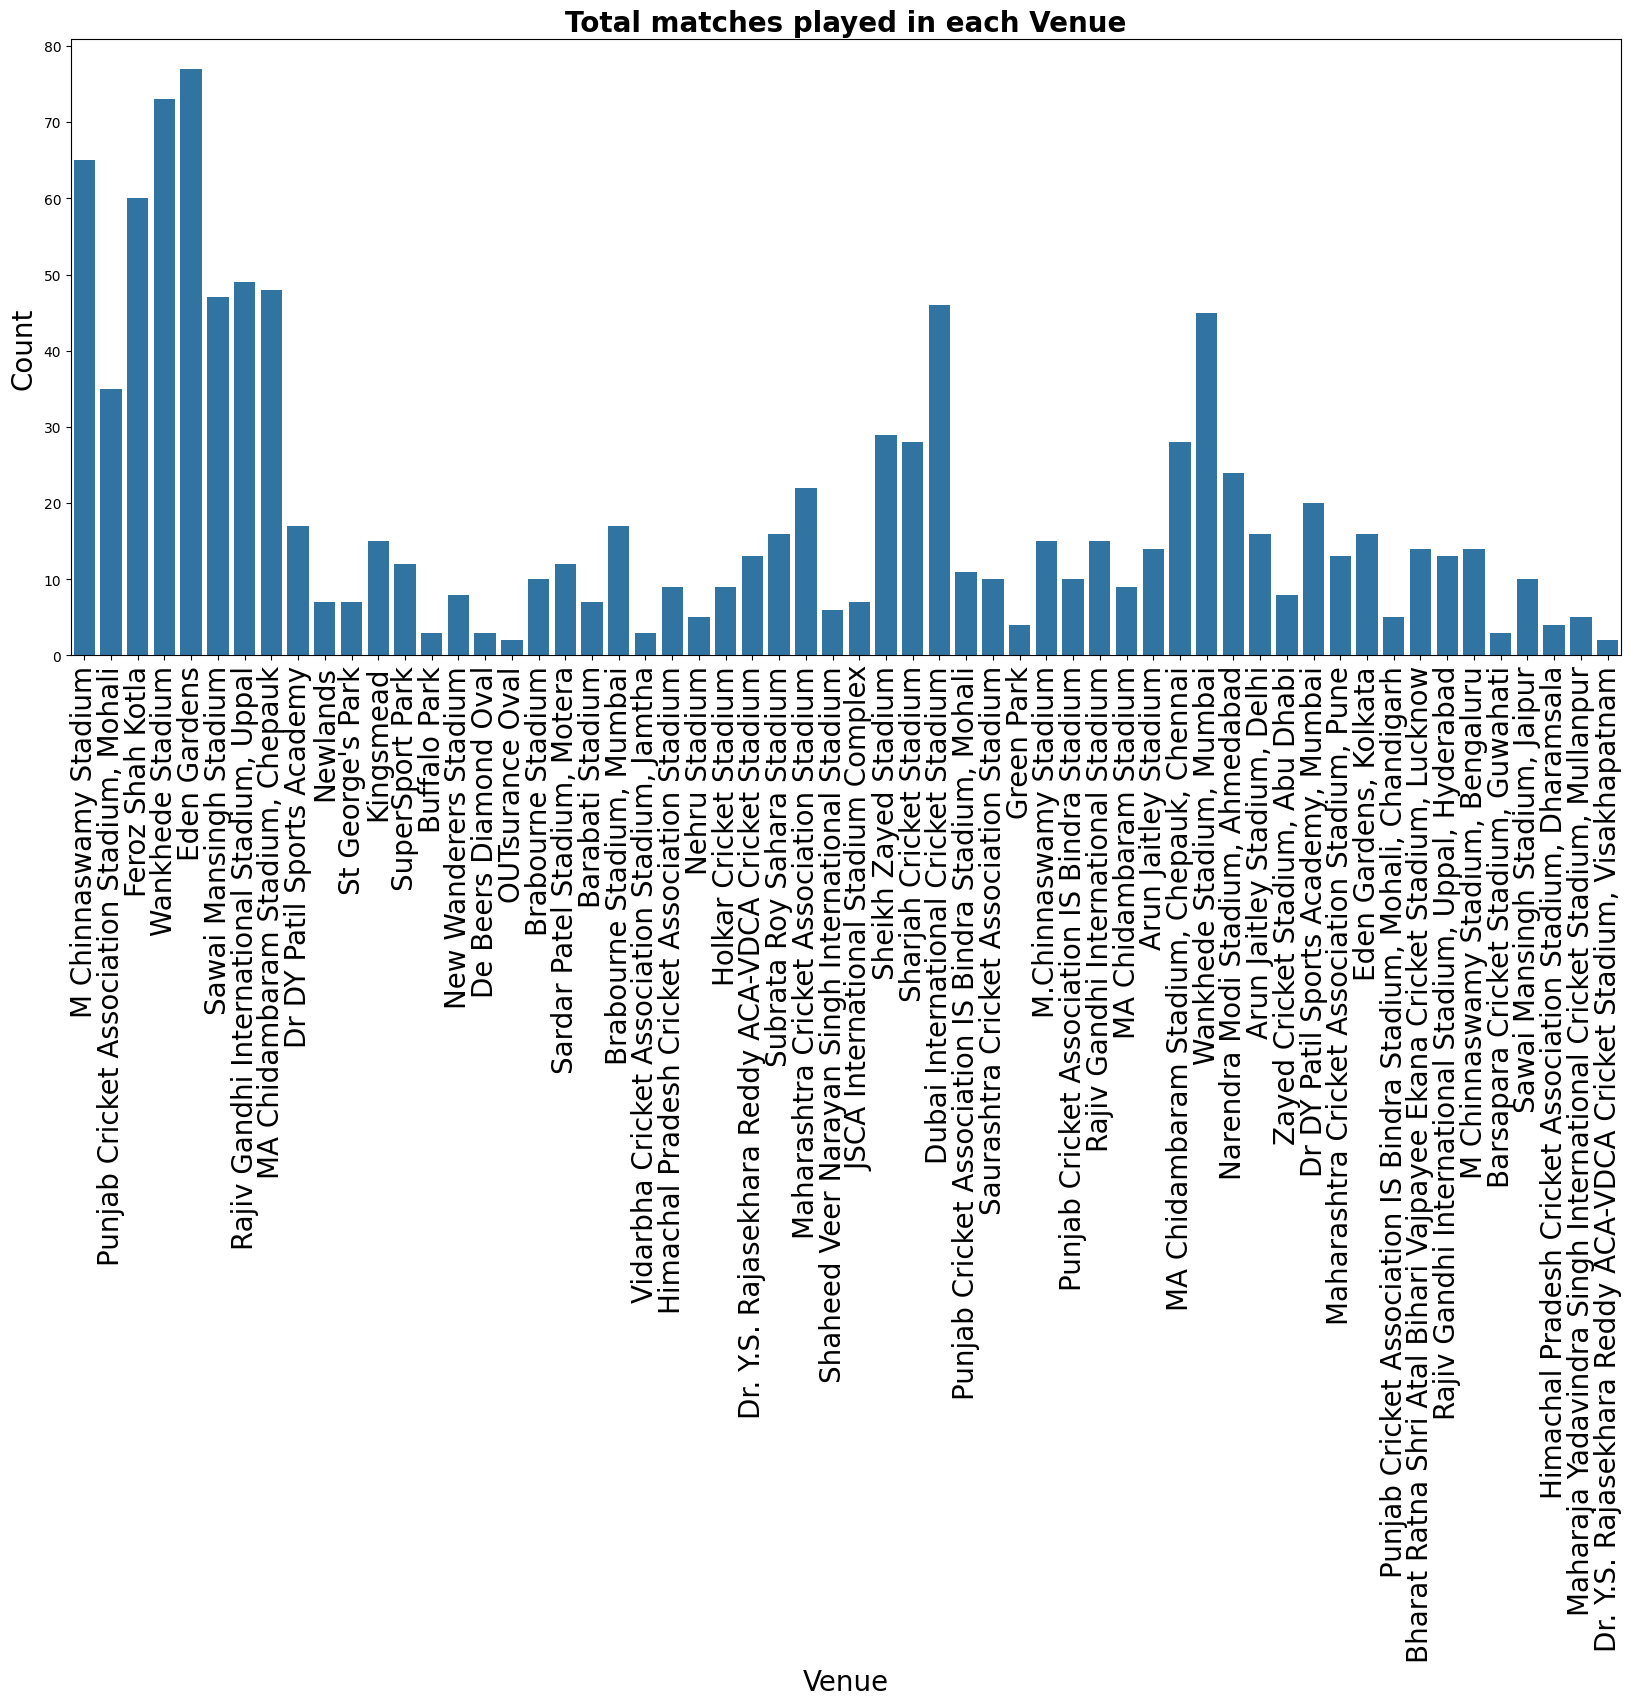

In [36]:
#Number of matches playes in each stadium
# mat.venue.value_counts().head(15).plot(kind="bar",figsize=(16,10))

plt.subplots(figsize=(20, 8))
sns.countplot(x="venue",data=mat)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Venue', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Total matches played in each Venue', fontsize = 20, fontweight = "bold")
plt.show()

In [37]:
def bat_first(x):
    if 'toss_winning_team'=='team1':
        if 'toss_decition'=='bat':
            return 'team1'
        else:
            return 'team2'
    elif 'toss_winning_team'=='team2':
        if 'toss_decition'=='bat':
            return 'team2'
        else:
            return 'team1'

In [38]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [39]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [40]:
filter=["team1","toss_winner"]

In [41]:
tab=df[filter]
tab.groupby(["team1"]).agg("count")


,toss_winner
team1,
Chennai Super Kings,31138
Deccan Chargers,9448
Delhi Capitals,10082
Delhi Daredevils,19753
Gujarat Lions,3784
Gujarat Titans,4954
Kings XI Punjab,21848
Kochi Tuskers Kerala,1563
Kolkata Knight Riders,28560


In [42]:
mat.groupby(["team1"]).agg({"match_id":"count"})

,match_id
team1,
Chennai Super Kings,128
Deccan Chargers,39
Delhi Capitals,41
Delhi Daredevils,85
Gujarat Lions,16
Gujarat Titans,21
Kings XI Punjab,92
Kochi Tuskers Kerala,7
Kolkata Knight Riders,121


In [43]:
season=df.groupby(['season'])['total_runs'].sum()
season

,total_runs
season,
2007/08,17937
2009,16353
2009/10,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862


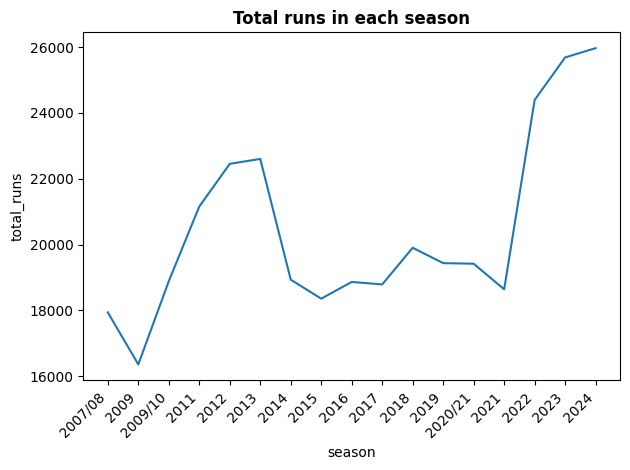

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your code to create the 'season' DataFrame)

# Your plotting code
ax = plt.axes()
ax.set(facecolor="white")
sns.lineplot(data=season) # Assuming 'season' is your data
plt.title("Total runs in each season", fontsize=12, fontweight="bold")

# Add this line to rotate the labels
plt.xticks(rotation=45, ha='right')

# This helps ensure the rotated labels fit within the plot area
plt.tight_layout()

plt.show()

In [59]:
x=dev.groupby(['batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
y=x.reset_index(drop=True,inplace=True)
y
x

,batting_team,total_runs
0,Mumbai Indians,42176
1,Kolkata Knight Riders,39331
2,Chennai Super Kings,38629
3,Royal Challengers Bangalore,37692
4,Rajasthan Royals,34747
5,Kings XI Punjab,30064
6,Sunrisers Hyderabad,29071
7,Delhi Daredevils,24296
8,Delhi Capitals,14900
9,Deccan Chargers,11463


In [60]:
mat["toss_winner"].value_counts().head(10)

,count
toss_winner,
Mumbai Indians,143
Kolkata Knight Riders,122
Chennai Super Kings,122
Rajasthan Royals,120
Royal Challengers Bangalore,113
Sunrisers Hyderabad,88
Kings XI Punjab,85
Delhi Daredevils,80
Delhi Capitals,50


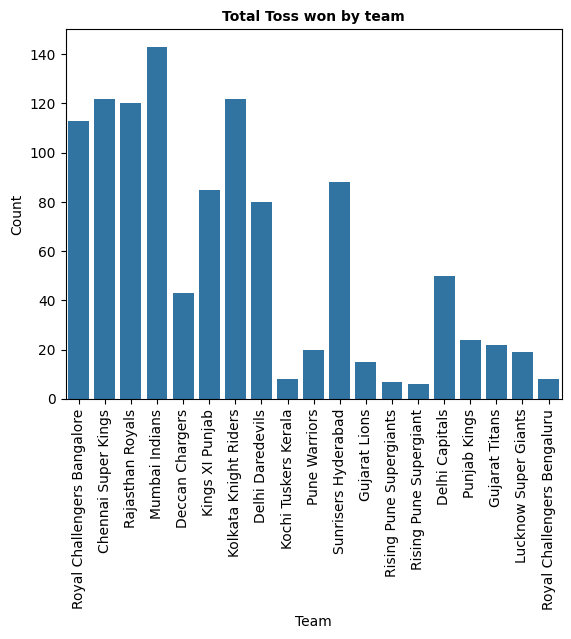

In [61]:
sns.countplot(x="toss_winner",data=mat)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Team', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Toss won by team', fontsize = 10, fontweight = "bold")
plt.show()

In [62]:
k=mat.toss_decision[ mat.toss_winner==mat.winner]
k

,toss_decision
1,bat
8,field
10,field
12,field
14,bat
...,...
1072,field
1073,bat
1075,field
1078,field


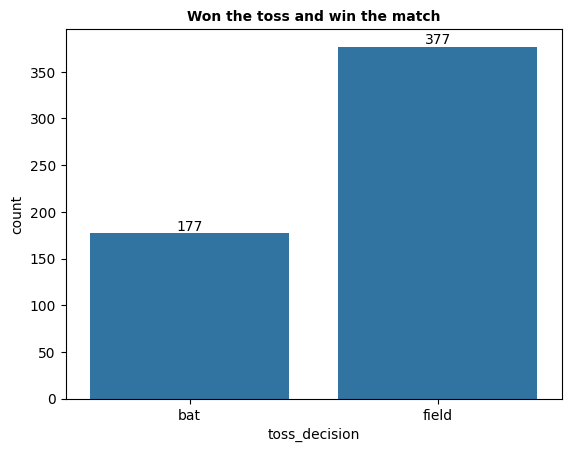

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'k' is your pandas Series from the previous step
# k = mat.toss_decision[mat.toss_winner == mat.winner]

# 1. Create the plot and store its Axes object in 'ax'
ax = sns.countplot(x=k)

# 2. Use ax.bar_label to add the numbers on top of the bars
# ax.containers[0] refers to the set of bars in your plot
ax.bar_label(ax.containers[0])

# 3. Set the title and show the plot
plt.title("Won the toss and win the match", fontsize=10, fontweight="bold")
plt.show()

In [65]:
mat.head(3)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar


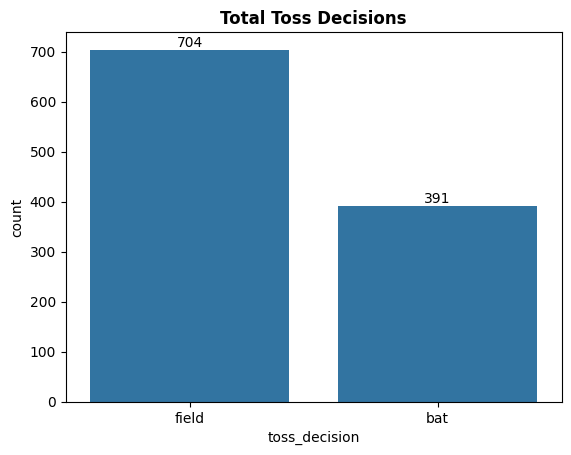

In [76]:
ax = sns.countplot(x="toss_decision", data=mat)

ax.bar_label(ax.containers[0])


plt.title("Total Toss Decisions", fontsize=12, fontweight="bold")
plt.show()

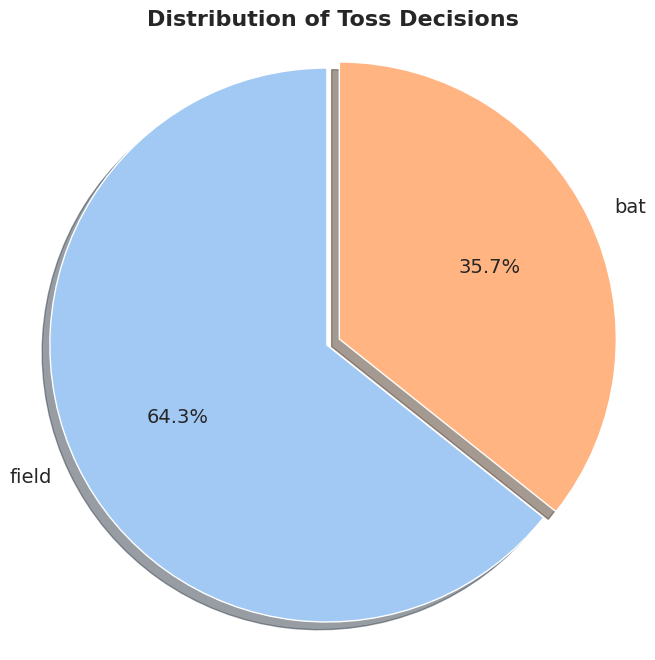

In [137]:
toss_decisions = mat['toss_decision'].value_counts()
labels = toss_decisions.index
sizes = toss_decisions.values
explode = (0.05, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        shadow=True,
        colors=sns.color_palette('pastel'),
        textprops={'fontsize': 14})

plt.title("Distribution of Toss Decisions", fontsize=16, fontweight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()

### BATSMAN OVERVIEW

In [69]:
dev.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

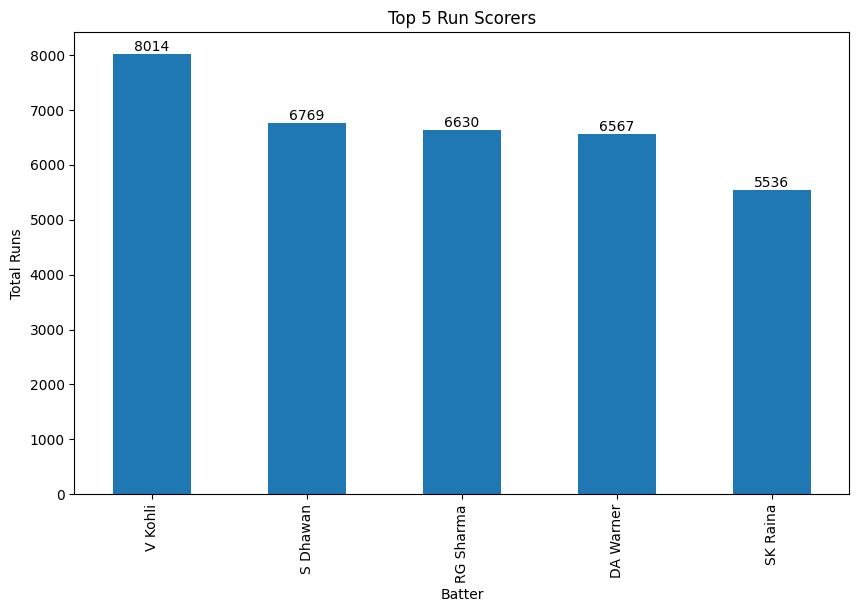

Top 5 Run Scorers:
batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64


In [86]:


top_scorers = dev.groupby(["batter"])["batsman_runs"].sum().sort_values(ascending=False).head(5)

# 2. Create the plot and get the Axes object
ax = top_scorers.plot(kind="bar", figsize=(10, 6), title="Top 5 Run Scorers")
plt.ylabel("Total Runs")
plt.xlabel("Batter")

# 3. Add the run totals on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 4. Show the plot
plt.show()

# 5. Print the list of top scorers and their runs
print("Top 5 Run Scorers:")
print(top_scorers)

In [78]:
player = (dev['batter']=='V Kohli')
kohli =dev[player]

In [79]:
def count(kohli,runs):
    return len(kohli[kohli['batsman_runs']==runs])*runs

In [90]:
# Assuming you have already created the 'kohli' and 'raina' DataFrames
# kohli = dev[dev['batter']=='V Kohli']
# raina = dev[dev['batter']=='SK Raina']

# Call the function with the correct DataFrame variables
print("Runs scored by Kohli from 1's :", count(kohli, 1))
print("Runs scored by Kohli from 2's :", count(kohli, 2))
print("Runs scored by Kohli from 3's :", count(kohli, 3))
print("Runs scored by Kohli from 4's :", count(kohli, 4))
print("Runs scored by Kohli from 6's :", count(kohli, 6))

Runs scored by Kohli from 1's : 2591
Runs scored by Kohli from 2's : 890
Runs scored by Kohli from 3's : 63
Runs scored by Kohli from 4's : 2832
Runs scored by Kohli from 6's : 1638


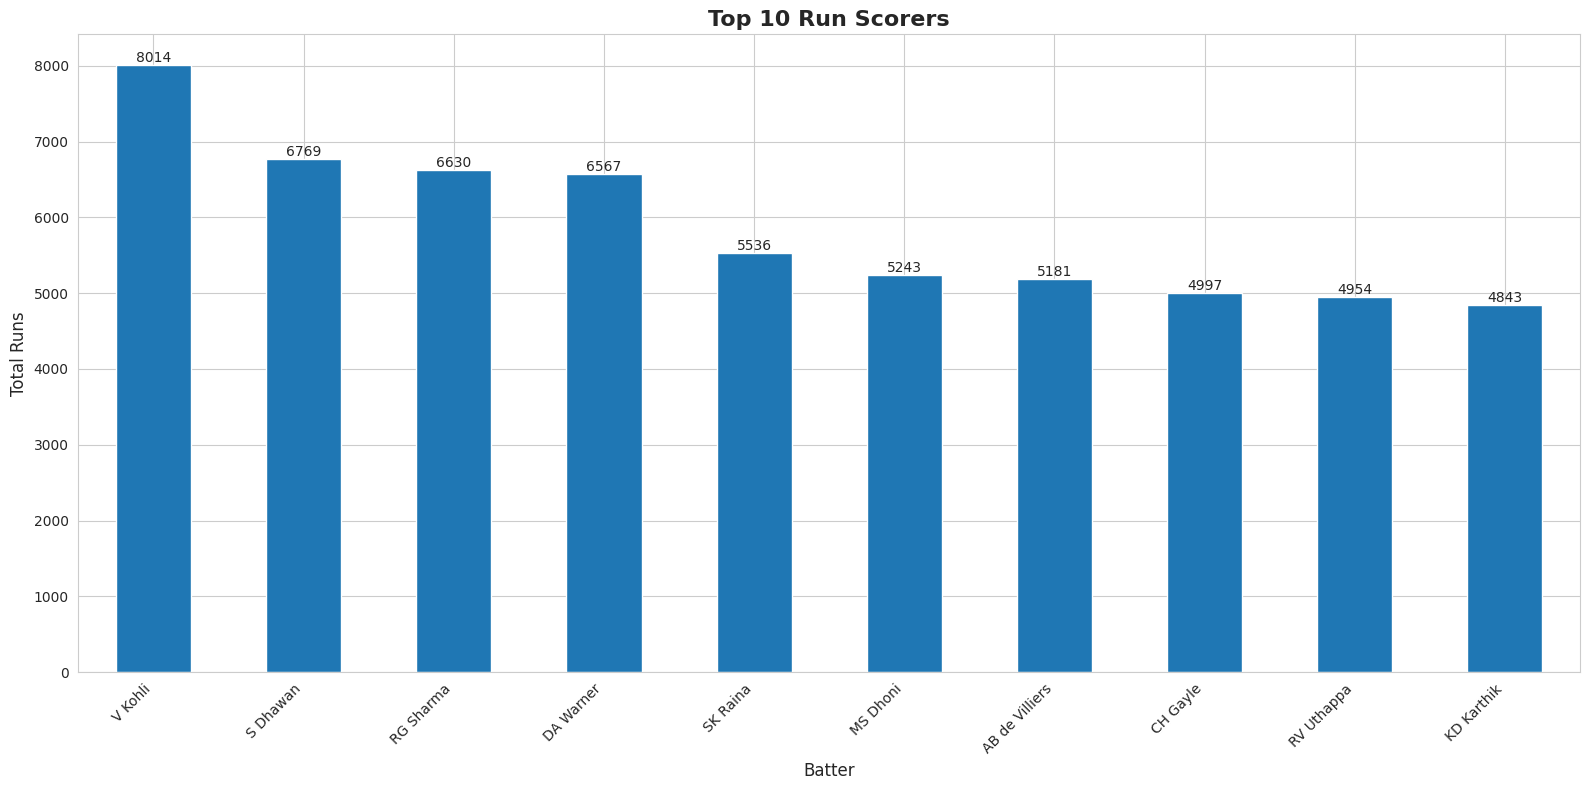

In [135]:
top_scorers = dev.groupby(["batter"])["batsman_runs"].sum().sort_values(ascending=False).head(10)

ax = top_scorers.plot(kind="bar", figsize=(16, 8))

ax.bar_label(ax.containers[0])

ax.set_title("Top 10 Run Scorers", fontsize=16, fontweight="bold")
ax.set_xlabel("Batter", fontsize=12)
ax.set_ylabel("Total Runs", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [93]:
strike_rate=dev.groupby(["batter"]).agg({"ball":"count","batsman_runs":"sum"}).sort_values(by="batsman_runs" ,ascending=False)

In [94]:
strike_rate["strike_rate"]=strike_rate.batsman_runs/strike_rate.ball*100

In [95]:
strike_rate.head(10)

,ball,batsman_runs,strike_rate
batter,,,
V Kohli,6236,8014,128.511867
S Dhawan,5483,6769,123.454313
RG Sharma,5183,6630,127.918194
DA Warner,4849,6567,135.429986
SK Raina,4177,5536,132.535312
MS Dhoni,3947,5243,132.835065
AB de Villiers,3487,5181,148.580442
CH Gayle,3516,4997,142.121729
RV Uthappa,3927,4954,126.152279


In [96]:
df.groupby(["batter","season"])["batsman_runs"].sum().sort_values(ascending=False).head(10)

,,batsman_runs
batter,season,
V Kohli,2016,973
Shubman Gill,2023,890
JC Buttler,2022,863
DA Warner,2016,848
V Kohli,2024,741
KS Williamson,2018,735
MEK Hussey,2013,733
CH Gayle,2012,733
F du Plessis,2023,730


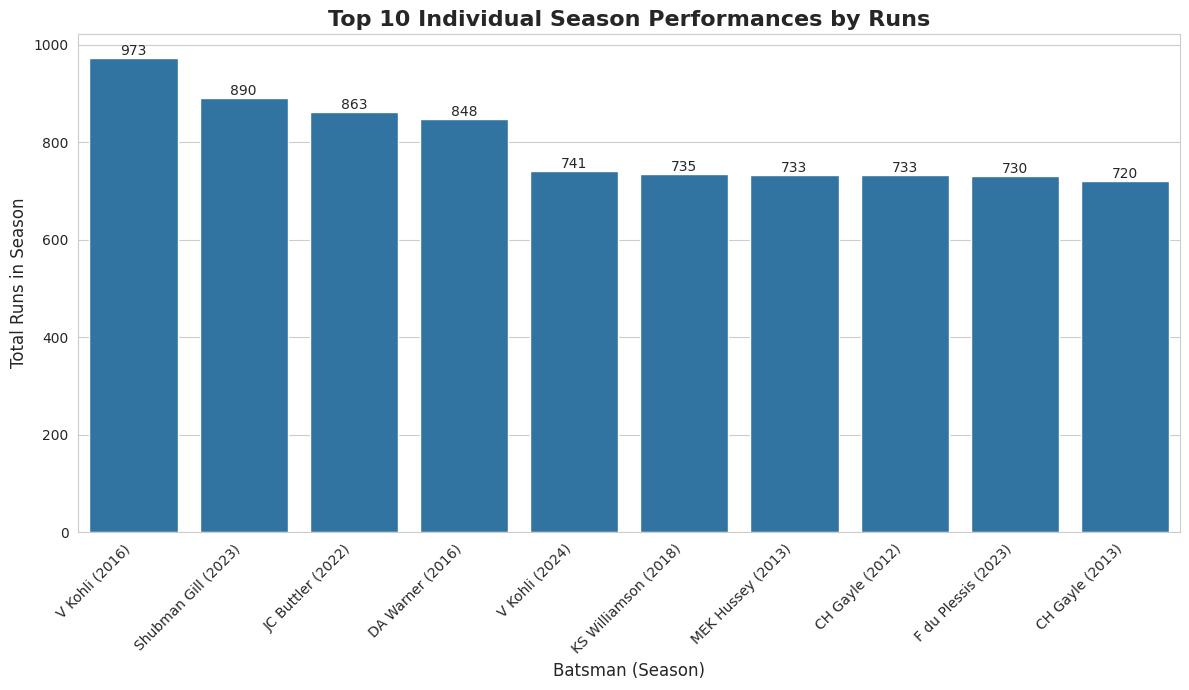

In [133]:


# 1. Store your data in a variable and reset the index
# This turns the multi-level index ('batter', 'season') into columns
top_performances = df.groupby(["batter", "season"])["batsman_runs"].sum().sort_values(ascending=False).head(10)
plot_data = top_performances.reset_index()

# Create a combined label for the x-axis
plot_data['batsman_season'] = plot_data['batter'] + ' (' + plot_data['season'].astype(str) + ')'

# 2. Set the plot size for better readability
plt.figure(figsize=(12, 7))

# 3. Create the bar plot using the new combined label for x-axis
ax = sns.barplot(x='batsman_season', y='batsman_runs', data=plot_data)

# 4. Add the run totals on top of each bar
ax.bar_label(ax.containers[0])

# 5. Improve readability and show the plot
plt.title("Top 10 Individual Season Performances by Runs", fontsize=16, fontweight='bold')
plt.xlabel("Batsman (Season)", fontsize=12)
plt.ylabel("Total Runs in Season", fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to make room for labels
plt.show()

In [107]:
dev.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

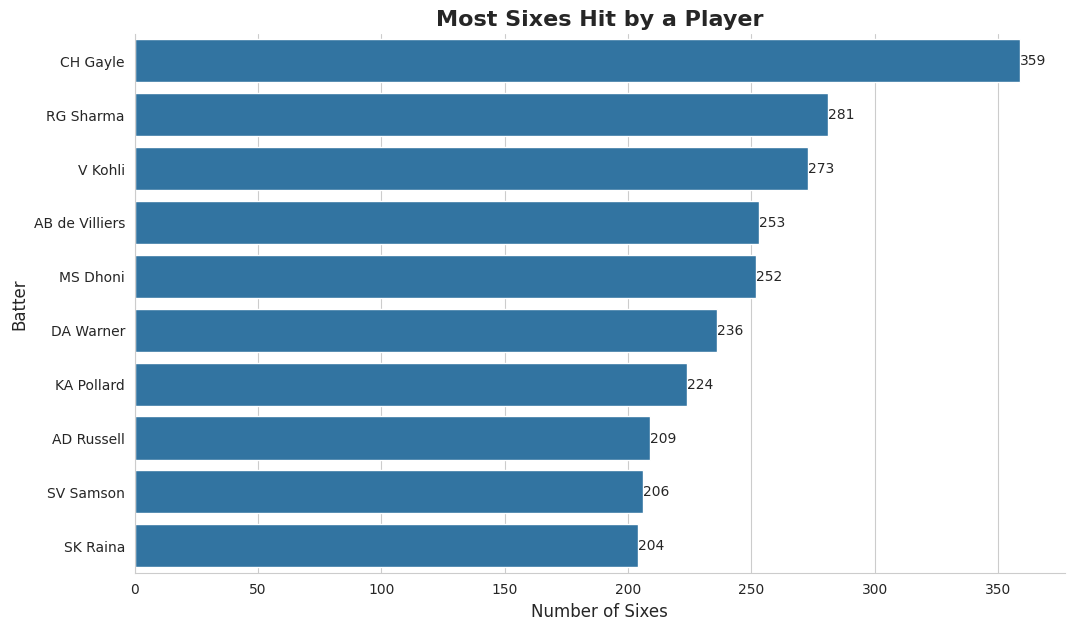

In [139]:
sixes_df = dev[dev['batsman_runs'] == 6]['batter'].value_counts().head(10).reset_index()
sixes_df.columns = ['Batter', 'Sixes']

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='Sixes',
    y='Batter',
    data=sixes_df
)

ax.bar_label(ax.containers[0])

ax.set_title("Most Sixes Hit by a Player", fontsize=16, fontweight="bold")
ax.set_xlabel("Number of Sixes", fontsize=12)
ax.set_ylabel("Batter", fontsize=12)
sns.despine()

plt.show()

In [140]:
sixes_by_season = dev[dev['batsman_runs'] == 6].groupby('season').size()

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=sixes_by_season.index,
    y=sixes_by_season.values,
    palette='crest'
)

ax.bar_label(ax.containers[0])

ax.set_title("Total Sixes Hit in Each Season", fontsize=16, fontweight="bold")
ax.set_xlabel("Season", fontsize=12)
ax.set_ylabel("Number of Sixes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

KeyError: 'season'

In [141]:
print(dev.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


# BOWLING OVERVIEW

In [110]:
dev.head(2)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [111]:
eco=dev.groupby("bowler").agg({"batsman_runs":"sum","ball":"count"}).sort_values(by="ball",ascending=False)

In [112]:
eco["economy"]=eco["batsman_runs"]/(eco["ball"]/6)

In [113]:
eco.head(10)

,batsman_runs,ball,economy
bowler,,,
R Ashwin,5178,4679,6.639880
SP Narine,4492,4146,6.500724
B Kumar,4744,4060,7.010837
PP Chawla,5027,3895,7.743774
RA Jadeja,4777,3895,7.358665
YS Chahal,4478,3628,7.405733
Harbhajan Singh,3928,3496,6.741419
A Mishra,4065,3444,7.081882
DJ Bravo,4178,3296,7.605583


In [121]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [122]:
df.groupby('bowler').agg({'total_runs':'sum','ball':'count','player_dismissed':'count'}).sort_values(by=['total_runs'],ascending=False).head(10)

,total_runs,ball,player_dismissed
bowler,,,
R Ashwin,5435,4679,198
PP Chawla,5179,3895,201
B Kumar,5051,4060,195
RA Jadeja,4917,3895,169
YS Chahal,4681,3628,213
SP Narine,4672,4146,200
UT Yadav,4442,3190,163
DJ Bravo,4436,3296,207
A Mishra,4193,3444,183


In [ ]:
from matplotlib import pyplot as plt
_df_21['total_runs'].plot(kind='line', figsize=(8, 4), title='total_runs')
plt.gca().spines[['top', 'right']].set_visible(False)

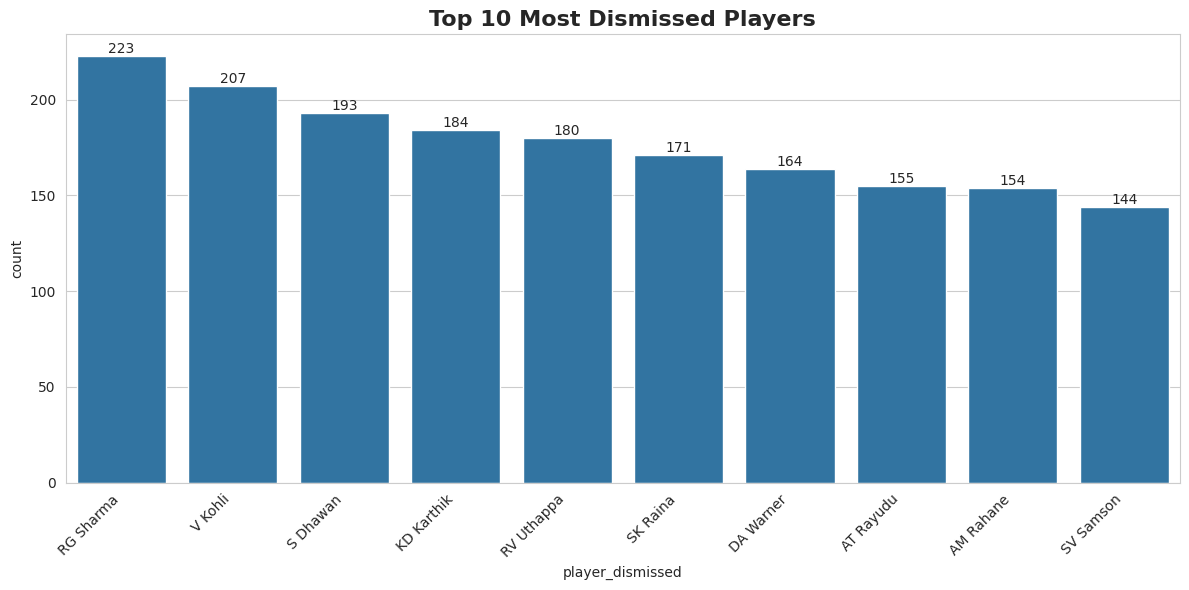

In [119]:
# Assuming 'plt', 'sns', and 'dev' (your DataFrame) are already defined

# 1. Find the top 10 most dismissed players
top_10_dismissed = dev['player_dismissed'].value_counts().head(10).index

# 2. Set the figure size for better readability
plt.figure(figsize=(12, 6))

# 3. Create the plot using the 'order' parameter to show only the top 10
ax = sns.countplot(x='player_dismissed', data=dev, order=top_10_dismissed)

# 4. Add the exact count on top of each bar
ax.bar_label(ax.containers[0])

# 5. Set the title and rotate labels for clarity
plt.title("Top 10 Most Dismissed Players", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjusts plot to prevent labels from being cut off
plt.show()

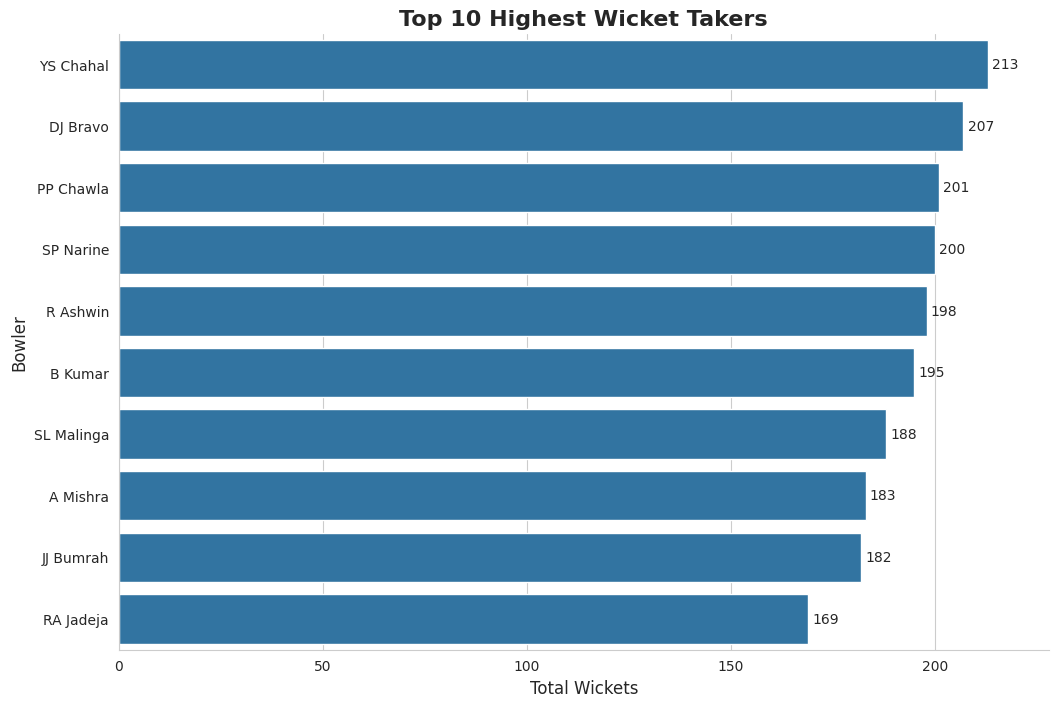

In [126]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.barplot(y=top_10_wickets.index, x=top_10_wickets.values)

ax.bar_label(ax.containers[0], padding=3)

ax.set_xlim(right=top_10_wickets.max() * 1.07)

ax.set_title("Top 10 Highest Wicket Takers", fontsize=16, fontweight="bold")
ax.set_xlabel("Total Wickets", fontsize=12)
ax.set_ylabel("Bowler", fontsize=12)
sns.despine()

plt.show()

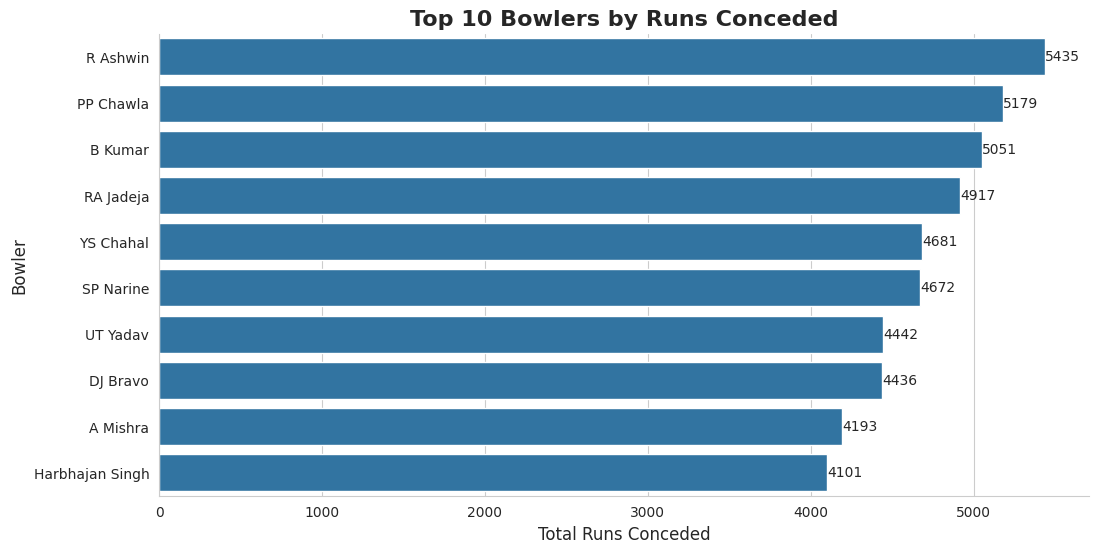

In [129]:
runs_given = dev.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y=runs_given.index, x=runs_given.values)

ax.bar_label(ax.containers[0])

ax.set_title("Top 10 Bowlers by Runs Conceded", fontsize=16, fontweight="bold")
ax.set_xlabel("Total Runs Conceded", fontsize=12)
ax.set_ylabel("Bowler", fontsize=12)
sns.despine()
plt.show()

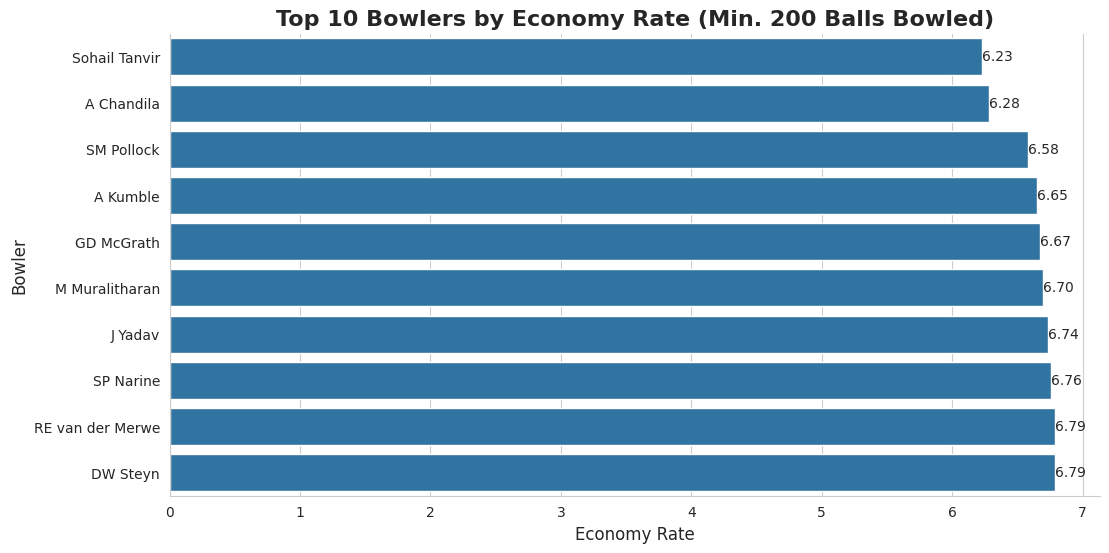

In [131]:
runs = dev.groupby('bowler')['total_runs'].sum()
balls = dev.groupby('bowler')['ball'].count()
economy = (runs / balls) * 6

bowler_stats = pd.DataFrame({'runs': runs, 'balls': balls, 'economy': economy})
qualified_bowlers = bowler_stats[bowler_stats['balls'] > 200]

top_10_economy = qualified_bowlers.sort_values(by='economy', ascending=True).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y=top_10_economy.index, x=top_10_economy['economy'])

ax.bar_label(ax.containers[0], fmt='%.2f')

ax.set_title("Top 10 Bowlers by Economy Rate (Min. 200 Balls Bowled)", fontsize=16, fontweight="bold")
ax.set_xlabel("Economy Rate", fontsize=12)
ax.set_ylabel("Bowler", fontsize=12)
sns.despine()
plt.show()